In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [50]:
data = pd.read_csv('./data/CPI.csv', parse_dates=True)
data = data.drop(['Date'], axis='columns')
time_series_name = 'CPI_MONTHLY'

In [39]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
res = AutoReg(data, lags=1, trend='n').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            CPI_MONTHLY   No. Observations:                  830
Model:                     AutoReg(1)   Log Likelihood                -219.386
Method:               Conditional MLE   S.D. of innovations              0.315
Date:                Thu, 18 Jul 2024   AIC                            442.771
Time:                        20:47:11   BIC                            452.212
Sample:                             1   HQIC                           446.392
                                  830                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CPI_MONTHLY.L1     0.7344      0.024     31.074      0.000       0.688       0.781
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3617           +0.0000j            1.3617            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
random_walk = pd.Series(data[time_series_name].shift(1), name='RANDOM_WALK')
ar1_values = pd.Series(res.fittedvalues, name='AR_1_VALUES')
data_and_fitted_results = pd.concat([data[time_series_name], ar1_values, random_walk], join='outer', axis='columns')
data_and_fitted_results

,CPI_MONTHLY,AR_1_VALUES,RANDOM_WALK
0,0.000000,NaN,NaN
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
825,-0.201514,-0.028155,-0.038338
826,-0.099332,-0.147989,-0.201514
827,0.544750,-0.072948,-0.099332
828,0.618967,0.400057,0.544750


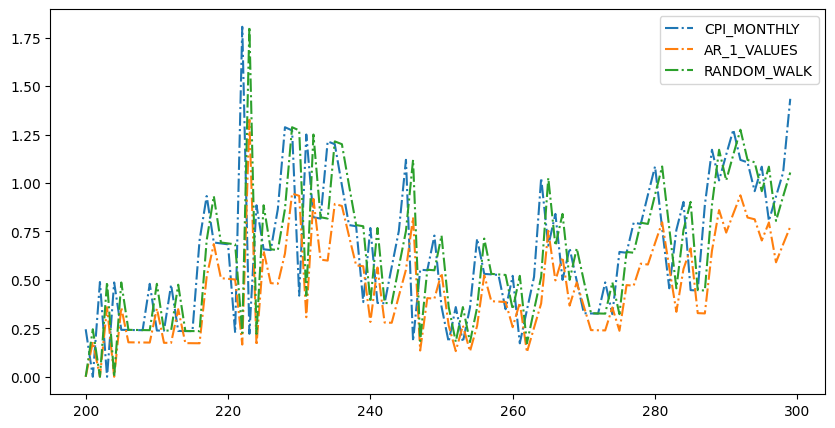

In [41]:
data_and_fitted_results[200:300].plot(figsize=(10, 5), style='-.')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
data_and_fitted_results = data_and_fitted_results.dropna()
for column in data_and_fitted_results.columns.drop(time_series_name):
    print('MSE for', column, mean_squared_error(data_and_fitted_results[time_series_name], data_and_fitted_results[column]))
    print('MAE for', column, mean_absolute_error(data_and_fitted_results[time_series_name], data_and_fitted_results[column]))
    print()


MSE for AR_1_VALUES 0.09940036097647743
MAE for AR_1_VALUES 0.23656462345407916

MSE for RANDOM_WALK 0.11454588172514357
MAE for RANDOM_WALK 0.2439671882535626

